In [1]:
import os, sys
import pandas as pd
from collections import defaultdict
import subprocess
from IPython.display import display, Markdown

pd.set_option('expand_frame_repr', False)

In [2]:
dir_path = "../../GitHubAPI-Crawler/notebooks/2021-01-01"
files = os.listdir(dir_path)

In [3]:
py_files = [f for f in files if f.endswith('.py') and not f.endswith(".ir.py")]
facts = [f for f in files if f.endswith('-fact')]
diff = (set(f[:-3] for f in py_files)) - (set(f[:-5] for f in facts))
diff

{'nb_1007',
 'nb_1008',
 'nb_1059',
 'nb_1060',
 'nb_1081',
 'nb_1084',
 'nb_1088',
 'nb_1149',
 'nb_1158',
 'nb_1162',
 'nb_1173',
 'nb_1175',
 'nb_1178',
 'nb_1182',
 'nb_1187',
 'nb_1200',
 'nb_1213',
 'nb_1215',
 'nb_1217',
 'nb_1235',
 'nb_1244',
 'nb_1274',
 'nb_1290',
 'nb_1318',
 'nb_1326',
 'nb_1353',
 'nb_1369',
 'nb_1406',
 'nb_1432',
 'nb_1437',
 'nb_1452',
 'nb_1453',
 'nb_1454',
 'nb_1455',
 'nb_1456',
 'nb_1457',
 'nb_1465',
 'nb_1469',
 'nb_1470',
 'nb_1485',
 'nb_1518',
 'nb_1542',
 'nb_1599',
 'nb_1602',
 'nb_1603',
 'nb_1605',
 'nb_1606',
 'nb_1607',
 'nb_1633',
 'nb_1637',
 'nb_1665',
 'nb_1667',
 'nb_1680',
 'nb_1681',
 'nb_1708',
 'nb_1715',
 'nb_1724',
 'nb_1771',
 'nb_636',
 'nb_659',
 'nb_662',
 'nb_752',
 'nb_769',
 'nb_834',
 'nb_861',
 'nb_880',
 'nb_881',
 'nb_891',
 'nb_892',
 'nb_893',
 'nb_913',
 'nb_932',
 'nb_966',
 'nb_967',
 'nb_973'}

In [9]:
proc = subprocess.Popen(f"grep 'invo' ../../GitHubAPI-Crawler/notebooks/2021-01-01/*/CallGraph*", shell=True, stdout=subprocess.PIPE)
bytes = proc.stdout.read()
arr = bytes.decode('UTF-8').split('\n')[:-1]
# sorted(arr, key = lambda x: int(x.split('/')[5][3:-5]))
sorted_methods = sorted(set(x.split('\t')[2] for x in arr))
with open("call1.txt", "w") as f:
    f.write('\n'.join(sorted_methods))

In [46]:
# query for leak distribution
proc = subprocess.Popen(f"grep -l 'invo' ../../GitHubAPI-Crawler/notebooks/2021-01-01/*/Multi*", shell=True, stdout=subprocess.PIPE)
bytes = proc.stdout.read()
arr = bytes.decode('UTF-8').split('\n')[:-1]
sorted(arr, key = lambda x: int(x.split('/')[5][3:-5]))
s1 = set(x.split('/')[5][3:-5] for x in arr)

In [18]:
proc = subprocess.Popen(f"grep -l '' ../../GitHubAPI-Crawler/notebooks/2021-01-01/*/Final*", shell=True, stdout=subprocess.PIPE)
bytes = proc.stdout.read()
arr = bytes.decode('UTF-8').split('\n')[:-1]
sorted(arr, key = lambda x: int(x.split('/')[5][3:-5]))
s2 = set(x.split('/')[5][3:-5] for x in arr)
print(len(s1), len(s2), len(s1 & s2), len(s1.symmetric_difference(s2)))

100 126 63 100


In [144]:
from random import sample
sorted(sample(arr, 20), key = lambda x: int(x.split('/')[5][3:-5]))

['../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_23-fact/MultiUseTestLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_33-fact/MultiUseTestLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_50-fact/MultiUseTestLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_56-fact/MultiUseTestLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_64-fact/MultiUseTestLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_134-fact/MultiUseTestLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_163-fact/MultiUseTestLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_167-fact/MultiUseTestLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_187-fact/MultiUseTestLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_259-fact/MultiUseTestLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_286-fact/MultiUseTestLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_288-fact/MultiUseTestLeak.csv',
 '../../GitHubAPI-Cra

In [2]:
import subprocess
from IPython.display import display, Markdown

class QueryManager(object):
    def __init__(self, file_path):
        self.file_path = file_path
        self.ir_path = file_path + ".ir.py"
        self.dir_path = file_path.replace(".py", "-fact")
        # leaks = ["PreProcessingLeak"] #, "OverlapLeak", "MultiUseTestLeak"]
        # self.leak_paths = {leak: os.path.join(self.dir_path, f'Telemetry_{leak}.csv') for leak in leaks}
        self.leak_paths = {}
        self.leak_paths["ModelPair"] = os.path.join(self.dir_path, "Telemetry_ModelPair.csv")
        self.leak_paths["PreProcessingLeak"] = os.path.join(self.dir_path, "Telemetry_FinalPreProcessingLeak.csv")
        self.leak_paths["FinalOverlapLeak"] = os.path.join(self.dir_path, "FinalOverlapLeak.csv")
        self.leak_paths["FinalNoTestData"] = os.path.join(self.dir_path, "FinalNoTestData.csv")
        # self.leak_paths["NoValAndTestData"] = os.path.join(self.dir_path, "NoValAndTestData.csv")
        # self.leak_paths["NoTestData"] = os.path.join(self.dir_path, "NoTestData.csv")
    
    def display_Leaks(self):
        for leak in self.leak_paths.keys():
            self.display_Leak(leak)
    
    def display_Leak(self, leak):
        read_df = getattr(self, "read_" + leak)
        df = read_df()
        if len(df) > 0:
            print(leak + " !!!")
            print(df)

    def read_ModelPair(self):
        df = pd.read_csv(self.leak_paths["ModelPair"], sep="\t", names=['trainModel', 'train', 'trainInvo', 'trainMeth', 'ctx1', 'testModel', 'test', 'testInvo', 'testMeth', 'ctx2'])
        return df

    def read_PreProcessingLeak(self):
        df = pd.read_csv(self.leak_paths["PreProcessingLeak"], sep="\t", names=['trainModel', 'train', 'trainInvo', 'trainMeth', 'ctx1', 'testModel', 'test', 'testInvo', 'testMeth', 'ctx2', 'des', 'src'])
        return df

    def read_OverlapLeak(self):
        df = pd.read_csv(self.leak_paths["OverlapLeak"], sep="\t", names=['trainModel', 'train', 'trainInvo', 'trainMeth', 'testModel', 'test', 'testInvo', 'testMeth'])
        return df

    def read_FinalOverlapLeak(self):
        df = pd.read_csv(self.leak_paths["FinalOverlapLeak"], sep="\t", names=['trainModel', 'train', 'trainInvo', 'trainMeth', 'ctx', 'cnt'])
        return df

    def read_MultiUseTestLeak(self):
        df = pd.read_csv(self.leak_paths["MultiUseTestLeak"], sep="\t", names=['testModel', 'test', 'testInvo', 'testMeth', 'testModel2', 'test2', 'testInvo2', 'testMeth2'])
        return df

    def read_NoValAndTestData(self):
        df = pd.read_csv(self.leak_paths["NoValAndTestData"], sep="\t", names=['trainModel', 'train', 'trainInvo', 'trainMeth'])
        return df
    
    def read_NoTestData(self):
        df = pd.read_csv(self.leak_paths["NoTestData"], sep="\t", names=['trainModel', 'train', 'trainInvo', 'trainMeth'])
        return df
    
    def read_FinalNoTestData(self):
        df = pd.read_csv(self.leak_paths["FinalNoTestData"], sep="\t", names=['msg'])
        return df

    def query(self, file, var):
        file_path = os.path.join(self.dir_path, file)
        subprocess.Popen(f"grep '{var}' {file_path}", shell=True)

    def query_pair(self, file, var1, var2=""):
        file_path = os.path.join(self.dir_path, file)
        subprocess.Popen(f"grep '{var1}\t.*{var2}\t' {file_path}", shell=True)

    def query_overlap(self, var1, var2=""):
        file_path = os.path.join(self.dir_path, "DataOverlap.csv")
        subprocess.Popen(f"grep '{var1}\t.*{var2}\t' {file_path}", shell=True)

    def find_flow_path(self, des, src):
        file_path = os.path.join(self.dir_path, "FlowFromEdge.csv")
        df = pd.read_csv(file_path, sep="\t", names=["to", "to_ctx", "from", "from_ctx", "tag"])
        graph = defaultdict(list)
        df.apply(lambda x: graph[x["from"]].append(x["to"]), axis=1)
        q = [[src]]
        while True:
            cur, *q = q
            if cur[-1] == des:
                print(cur)
                break
            if len(cur) >= 10:
                print("Unfound!")
                break
            for x in graph[cur[-1]]:
                q.append(cur + [x])

    
    def find_pattern(self, pattern, lines = 10):
        subprocess.Popen(f"grep -C {lines} '{pattern}' {self.ir_path}", shell=True)

    def display_links(self):
        d = {"ori_python": self.file_path, 
            "ir_python": self.ir_path}
        for k,v in d.items():
            display(Markdown(f"[{k}]({v})"))
        dir = sorted(os.listdir(self.dir_path))
        texts = ", ".join([f"[{fact}]({os.path.join(self.dir_path, fact)})" for fact in dir if fact.endswith("csv")])
        display(Markdown(texts))

In [44]:
# dir_path = "../tests/inputs/"
# file_path = os.path.join(dir_path, "nb_175471.py")
# q = QueryManager(file_path)
# q.display_links()
# q.display_Leaks()

In [32]:
df[df["pre"] == True] 

,nb,model,pre,overlap,multi
3,future-sales-prediction-playground.py,True,True,False,False
20,simple-lgbmregressor-baseline.py,True,True,False,False
22,predict-sales-time-series-with-cnn.py,True,True,False,False
35,future-sales-xgboost-top-3.py,True,True,False,False
37,predict-future-sales-top-11-solution.py,True,True,False,False
42,ensemble-learning-part-2-blend-a-smoothie.py,True,True,True,False
43,sales-forecast-lstm-67-beginner-friendly.py,True,True,False,True
44,learn-machine-learning-faster-1.py,True,True,False,False


In [35]:
dir_path = "../../GitHubAPI-Crawler/kaggle-notebooks/competitive-data-science-predict-future-sales/"
file_path = os.path.join(dir_path, "predict-future-sales-top-11-solution.py")
q = QueryManager(file_path)
q.display_links()
q.display_Leaks()

[ori_python](../../GitHubAPI-Crawler/kaggle-notebooks/competitive-data-science-predict-future-sales/predict-future-sales-top-11-solution.py)

[ir_python](../../GitHubAPI-Crawler/kaggle-notebooks/competitive-data-science-predict-future-sales/predict-future-sales-top-11-solution.py.ir.py)

[Alias.csv](../../GitHubAPI-Crawler/kaggle-notebooks/competitive-data-science-predict-future-sales/predict-future-sales-top-11-solution-fact/Alias.csv), [CallGraphEdge.csv](../../GitHubAPI-Crawler/kaggle-notebooks/competitive-data-science-predict-future-sales/predict-future-sales-top-11-solution-fact/CallGraphEdge.csv), [DataOverlap.csv](../../GitHubAPI-Crawler/kaggle-notebooks/competitive-data-science-predict-future-sales/predict-future-sales-top-11-solution-fact/DataOverlap.csv), [FieldPointsTo.csv](../../GitHubAPI-Crawler/kaggle-notebooks/competitive-data-science-predict-future-sales/predict-future-sales-top-11-solution-fact/FieldPointsTo.csv), [FilteredTests.csv](../../GitHubAPI-Crawler/kaggle-notebooks/competitive-data-science-predict-future-sales/predict-future-sales-top-11-solution-fact/FilteredTests.csv), [FinalNoTestData.csv](../../GitHubAPI-Crawler/kaggle-notebooks/competitive-data-science-predict-future-sales/predict-future-sales-top-11-solution-fact/FinalNoTestData.csv), [FinalNoTestDataWithMultiUse.csv](../../GitHubAPI-Crawler/kaggle-notebooks/competitive-data-science-predict-future-sales/predict-future-sales-top-11-solution-fact/FinalNoTestDataWithMultiUse.csv), [FinalOverlapLeak.csv](../../GitHubAPI-Crawler/kaggle-notebooks/competitive-data-science-predict-future-sales/predict-future-sales-top-11-solution-fact/FinalOverlapLeak.csv), [FlowFrom.csv](../../GitHubAPI-Crawler/kaggle-notebooks/competitive-data-science-predict-future-sales/predict-future-sales-top-11-solution-fact/FlowFrom.csv), [FlowFromEdge.csv](../../GitHubAPI-Crawler/kaggle-notebooks/competitive-data-science-predict-future-sales/predict-future-sales-top-11-solution-fact/FlowFromEdge.csv), [FlowFromExtended.csv](../../GitHubAPI-Crawler/kaggle-notebooks/competitive-data-science-predict-future-sales/predict-future-sales-top-11-solution-fact/FlowFromExtended.csv), [IndexContentPointsTo.csv](../../GitHubAPI-Crawler/kaggle-notebooks/competitive-data-science-predict-future-sales/predict-future-sales-top-11-solution-fact/IndexContentPointsTo.csv), [InvokeEdge.csv](../../GitHubAPI-Crawler/kaggle-notebooks/competitive-data-science-predict-future-sales/predict-future-sales-top-11-solution-fact/InvokeEdge.csv), [InvokePath.csv](../../GitHubAPI-Crawler/kaggle-notebooks/competitive-data-science-predict-future-sales/predict-future-sales-top-11-solution-fact/InvokePath.csv), [ModelPair.csv](../../GitHubAPI-Crawler/kaggle-notebooks/competitive-data-science-predict-future-sales/predict-future-sales-top-11-solution-fact/ModelPair.csv), [ModelPairCandidate.csv](../../GitHubAPI-Crawler/kaggle-notebooks/competitive-data-science-predict-future-sales/predict-future-sales-top-11-solution-fact/ModelPairCandidate.csv), [MultiUseTestLeak.csv](../../GitHubAPI-Crawler/kaggle-notebooks/competitive-data-science-predict-future-sales/predict-future-sales-top-11-solution-fact/MultiUseTestLeak.csv), [NoTestData.csv](../../GitHubAPI-Crawler/kaggle-notebooks/competitive-data-science-predict-future-sales/predict-future-sales-top-11-solution-fact/NoTestData.csv), [NoValAndTestData.csv](../../GitHubAPI-Crawler/kaggle-notebooks/competitive-data-science-predict-future-sales/predict-future-sales-top-11-solution-fact/NoValAndTestData.csv), [OverlapLeak.csv](../../GitHubAPI-Crawler/kaggle-notebooks/competitive-data-science-predict-future-sales/predict-future-sales-top-11-solution-fact/OverlapLeak.csv), [PreProcessingLeak.csv](../../GitHubAPI-Crawler/kaggle-notebooks/competitive-data-science-predict-future-sales/predict-future-sales-top-11-solution-fact/PreProcessingLeak.csv), [ScoredDataWithModel.csv](../../GitHubAPI-Crawler/kaggle-notebooks/competitive-data-science-predict-future-sales/predict-future-sales-top-11-solution-fact/ScoredDataWithModel.csv), [TaintStartsTarget.csv](../../GitHubAPI-Crawler/kaggle-notebooks/competitive-data-science-predict-future-sales/predict-future-sales-top-11-solution-fact/TaintStartsTarget.csv), [Telemetry_FinalPreProcessingLeak.csv](../../GitHubAPI-Crawler/kaggle-notebooks/competitive-data-science-predict-future-sales/predict-future-sales-top-11-solution-fact/Telemetry_FinalPreProcessingLeak.csv), [Telemetry_ModelPair.csv](../../GitHubAPI-Crawler/kaggle-notebooks/competitive-data-science-predict-future-sales/predict-future-sales-top-11-solution-fact/Telemetry_ModelPair.csv), [Telemetry_MultiUseTestLeak.csv](../../GitHubAPI-Crawler/kaggle-notebooks/competitive-data-science-predict-future-sales/predict-future-sales-top-11-solution-fact/Telemetry_MultiUseTestLeak.csv), [Telemetry_OverlapLeak.csv](../../GitHubAPI-Crawler/kaggle-notebooks/competitive-data-science-predict-future-sales/predict-future-sales-top-11-solution-fact/Telemetry_OverlapLeak.csv), [Telemetry_PreProcessingLeak.csv](../../GitHubAPI-Crawler/kaggle-notebooks/competitive-data-science-predict-future-sales/predict-future-sales-top-11-solution-fact/Telemetry_PreProcessingLeak.csv), [TestDataWithModel.csv](../../GitHubAPI-Crawler/kaggle-notebooks/competitive-data-science-predict-future-sales/predict-future-sales-top-11-solution-fact/TestDataWithModel.csv), [TorchModelWithData.csv](../../GitHubAPI-Crawler/kaggle-notebooks/competitive-data-science-predict-future-sales/predict-future-sales-top-11-solution-fact/TorchModelWithData.csv), [TrainingDataWithModel.csv](../../GitHubAPI-Crawler/kaggle-notebooks/competitive-data-science-predict-future-sales/predict-future-sales-top-11-solution-fact/TrainingDataWithModel.csv), [ValDataWithModel.csv](../../GitHubAPI-Crawler/kaggle-notebooks/competitive-data-science-predict-future-sales/predict-future-sales-top-11-solution-fact/ValDataWithModel.csv), [ValOrTestDataWithModel.csv](../../GitHubAPI-Crawler/kaggle-notebooks/competitive-data-science-predict-future-sales/predict-future-sales-top-11-solution-fact/ValOrTestDataWithModel.csv), [VarEquals.csv](../../GitHubAPI-Crawler/kaggle-notebooks/competitive-data-science-predict-future-sales/predict-future-sales-top-11-solution-fact/VarEquals.csv), [VarPointsTo.csv](../../GitHubAPI-Crawler/kaggle-notebooks/competitive-data-science-predict-future-sales/predict-future-sales-top-11-solution-fact/VarPointsTo.csv)

ModelPair !!!
  trainModel     train trainInvo         trainMeth  ctx1 testModel     test  testInvo          testMeth  ctx2
0    model_0    trainx   $invo51  XGBRegressor.fit  [, ]   model_0  _var117   $invo52  XGBModel.predict  [, ]
1    model_2  trainx_0  $invo205  XGBRegressor.fit  [, ]   model_2     valx  $invo206  XGBModel.predict  [, ]
2    model_2  trainx_0  $invo205  XGBRegressor.fit  [, ]   model_2    testx  $invo211  XGBModel.predict  [, ]
PreProcessingLeak !!!
   trainModel     train trainInvo         trainMeth  ctx1 testModel     test  testInvo          testMeth  ctx2        des                src
0     model_0    trainx   $invo51  XGBRegressor.fit  [, ]   model_0  _var117   $invo52  XGBModel.predict  [, ]      tfidf            _var467
1     model_0    trainx   $invo51  XGBRegressor.fit  [, ]   model_0  _var117   $invo52  XGBModel.predict  [, ]    _var468            _var467
2     model_2  trainx_0  $invo205  XGBRegressor.fit  [, ]   model_2     valx  $invo206  XGBModel.pred

In [71]:
q.find_flow_path('x_train', 'inde_variables_0')

NameError: name 'q' is not defined

In [39]:
q.query_pair("FlowFrom.csv", 'X_test')

X_test	[, ]	_var106	[, ]	normal
X_test	[, ]	_var107	[, ]	normal
X_test	[, ]	cur_Xy	[, ]	data
X_test	[, ]	cur_Xy	[, ]	normal
X_test	[, ]	_var141	[, ]	normal
X_test	[, ]	_var143	[, ]	normal
X_test	[, ]	cur_len	[, ]	normal
X_test	[, ]	cur_Xy_test	[, ]	data
X_test	[, ]	cur_Xy_test	[, ]	normal
X_test	[, ]	X_test	[, ]	data
X_test	[, ]	X_test	[, ]	normal
X_test	[, ]	X_test	[, ]	equiv
X_test	[, ]	processed_trainset	[, ]	data
X_test	[, ]	processed_trainset	[, ]	normal
X_test	[, ]	_var142	[, ]	normal
X_test	[, ]	train_test_perc	[, ]	normal
_var151	[, ]	X_test	[, ]	normal
predictions	[, ]	X_test	[, ]	normal
_var152	[, ]	X_test	[, ]	normal
X_test_1	[, ]	X_test	[, ]	data
X_test_1	[, ]	X_test	[, ]	normal
X_test_1	[, ]	X_test	[, ]	equiv
predictions_1	[, ]	X_test	[, ]	normal
predictions_4	[, ]	X_test	[, ]	normal


In [40]:
# q.find_pattern('model.fit', 20)
q.query_overlap('X_test')

X_test	[, ]	_var136	[, ]
X_test	[, ]	cur_Xy	[, ]
X_test	[, ]	cur_Xy_test	[, ]
X_test	[, ]	X_test	[, ]
X_test	[, ]	_var151	[, ]
X_test	[, ]	y_test	[, ]
X_test	[, ]	_var159	[, ]
X_test	[, ]	processed_trainset	[, ]
X_test	[, ]	cur_Xy_1	[, ]
X_test	[, ]	X_test_1	[, ]
X_test	[, ]	cur_Xy_test_1	[, ]
X_test	[, ]	y_test_1	[, ]
X_test	[, ]	_var114	[, ]
X_test	[, ]	_var116	[, ]
X_test	[, ]	_var120	[, ]
X_test	[, ]	_var132	[, ]


## Analyzing Kaggle Notebooks

In [4]:
import pandas as pd
import os
dir_path = "/usr0/home/cyang3/Projects/GitHubAPI-Crawler/kaggle-notebooks/titanic_voted"
["house-prices-advanced-regression-techniques_recent", "titanic_recent"]
df = pd.read_csv(os.path.join(dir_path, "log.txt"), sep="\t", index_col=False, names=["nb", "msg", "t1", "t2", "t3", "t"])
df = df[df["msg"] == "Success!"]
df["nb"] = df["nb"].map(lambda x: os.path.join(dir_path, x))

# df = df[df["nb"].map(lambda x: os.path.exists(x.replace(".py", "-fact")))]
def find_results(file_path):
    file_length = len(open(file_path).read().splitlines())
    file_path = file_path.replace(".py", "-fact")
    model_pairs = os.path.join(file_path, "ModelPair.csv")
    pre_leaks = os.path.join(file_path, "Telemetry_FinalPreProcessingLeak.csv")
    overlap_leaks = os.path.join(file_path, "FinalOverlapLeak.csv")
    multi_leaks = os.path.join(file_path, "FinalNoTestDataWithMultiUse.csv")
    has_pairs = len(open(model_pairs).read().splitlines()) > 0
    has_pre_leaks = len(open(pre_leaks).read().splitlines()) > 0
    has_overlap_leaks = len(open(overlap_leaks).read().splitlines()) > 0
    has_multi_leaks = len(open(multi_leaks).read().splitlines()) > 0
    return {"model": has_pairs, "pre": has_pre_leaks, "overlap": has_overlap_leaks, "multi": has_multi_leaks, "length":file_length}
# df.merge(df["nb"].map(find_results), left_index=True, right_index=True)
applied_df = df.apply(lambda row: find_results(row["nb"]), axis='columns', result_type='expand')
df = pd.concat([df, applied_df], axis='columns')
df["nb"] = df["nb"].map(lambda x: '/'.join(x.split('/')[-1:]))
df, df[df["pre"]]

(            nb       msg    t1    t2    t3     t  model    pre  overlap  multi  length
 0      nb_0.py  Success!  0.05  3.36  1.37  4.78   True   True    False  False    1021
 1      nb_1.py  Success!  0.01  1.49  0.31  1.81  False  False    False  False     342
 2      nb_2.py  Success!  0.02  1.20  0.42  1.63  False  False    False  False     700
 3      nb_3.py  Success!  0.06  2.76  1.91  4.73  False  False    False  False     480
 4      nb_4.py  Success!  0.10  4.97  2.16  7.23   True  False    False  False    1735
 ..         ...       ...   ...   ...   ...   ...    ...    ...      ...    ...     ...
 165  nb_156.py  Success!  0.04  2.97  1.12  4.14   True   True     True  False     738
 166  nb_157.py  Success!  0.01  1.15  0.33  1.49   True   True    False  False     207
 167  nb_158.py  Success!  0.00  0.59  0.23  0.81  False  False    False  False     486
 168  nb_159.py  Success!  0.01  1.67  0.48  2.16  False  False    False   True     590
 169  nb_160.py  Success!  0.02 

In [10]:
dir_path = "../../GitHubAPI-Crawler/kaggle-notebooks/titanic_voted/"
file_path = os.path.join(dir_path, "nb_11.py")
q = QueryManager(file_path)
q.display_links()
q.display_Leaks()

[ori_python](../../GitHubAPI-Crawler/kaggle-notebooks/titanic_voted/nb_11.py)

[ir_python](../../GitHubAPI-Crawler/kaggle-notebooks/titanic_voted/nb_11.py.ir.py)

[Alias.csv](../../GitHubAPI-Crawler/kaggle-notebooks/titanic_voted/nb_11-fact/Alias.csv), [CallGraphEdge.csv](../../GitHubAPI-Crawler/kaggle-notebooks/titanic_voted/nb_11-fact/CallGraphEdge.csv), [DataOverlap.csv](../../GitHubAPI-Crawler/kaggle-notebooks/titanic_voted/nb_11-fact/DataOverlap.csv), [FieldPointsTo.csv](../../GitHubAPI-Crawler/kaggle-notebooks/titanic_voted/nb_11-fact/FieldPointsTo.csv), [FilteredTests.csv](../../GitHubAPI-Crawler/kaggle-notebooks/titanic_voted/nb_11-fact/FilteredTests.csv), [FinalNoTestData.csv](../../GitHubAPI-Crawler/kaggle-notebooks/titanic_voted/nb_11-fact/FinalNoTestData.csv), [FinalNoTestDataWithMultiUse.csv](../../GitHubAPI-Crawler/kaggle-notebooks/titanic_voted/nb_11-fact/FinalNoTestDataWithMultiUse.csv), [FinalOverlapLeak.csv](../../GitHubAPI-Crawler/kaggle-notebooks/titanic_voted/nb_11-fact/FinalOverlapLeak.csv), [FlowFrom.csv](../../GitHubAPI-Crawler/kaggle-notebooks/titanic_voted/nb_11-fact/FlowFrom.csv), [FlowFromEdge.csv](../../GitHubAPI-Crawler/kaggle-notebooks/titanic_voted/nb_11-fact/FlowFromEdge.csv), [FlowFromExtended.csv](../../GitHubAPI-Crawler/kaggle-notebooks/titanic_voted/nb_11-fact/FlowFromExtended.csv), [IndexContentPointsTo.csv](../../GitHubAPI-Crawler/kaggle-notebooks/titanic_voted/nb_11-fact/IndexContentPointsTo.csv), [InvokeEdge.csv](../../GitHubAPI-Crawler/kaggle-notebooks/titanic_voted/nb_11-fact/InvokeEdge.csv), [InvokePath.csv](../../GitHubAPI-Crawler/kaggle-notebooks/titanic_voted/nb_11-fact/InvokePath.csv), [ModelPair.csv](../../GitHubAPI-Crawler/kaggle-notebooks/titanic_voted/nb_11-fact/ModelPair.csv), [ModelPairCandidate.csv](../../GitHubAPI-Crawler/kaggle-notebooks/titanic_voted/nb_11-fact/ModelPairCandidate.csv), [MultiUseTestLeak.csv](../../GitHubAPI-Crawler/kaggle-notebooks/titanic_voted/nb_11-fact/MultiUseTestLeak.csv), [NoTestData.csv](../../GitHubAPI-Crawler/kaggle-notebooks/titanic_voted/nb_11-fact/NoTestData.csv), [NoValAndTestData.csv](../../GitHubAPI-Crawler/kaggle-notebooks/titanic_voted/nb_11-fact/NoValAndTestData.csv), [OverlapLeak.csv](../../GitHubAPI-Crawler/kaggle-notebooks/titanic_voted/nb_11-fact/OverlapLeak.csv), [PreProcessingLeak.csv](../../GitHubAPI-Crawler/kaggle-notebooks/titanic_voted/nb_11-fact/PreProcessingLeak.csv), [ScoredDataWithModel.csv](../../GitHubAPI-Crawler/kaggle-notebooks/titanic_voted/nb_11-fact/ScoredDataWithModel.csv), [TaintStartsTarget.csv](../../GitHubAPI-Crawler/kaggle-notebooks/titanic_voted/nb_11-fact/TaintStartsTarget.csv), [Telemetry_FinalPreProcessingLeak.csv](../../GitHubAPI-Crawler/kaggle-notebooks/titanic_voted/nb_11-fact/Telemetry_FinalPreProcessingLeak.csv), [Telemetry_ModelPair.csv](../../GitHubAPI-Crawler/kaggle-notebooks/titanic_voted/nb_11-fact/Telemetry_ModelPair.csv), [Telemetry_MultiUseTestLeak.csv](../../GitHubAPI-Crawler/kaggle-notebooks/titanic_voted/nb_11-fact/Telemetry_MultiUseTestLeak.csv), [Telemetry_OverlapLeak.csv](../../GitHubAPI-Crawler/kaggle-notebooks/titanic_voted/nb_11-fact/Telemetry_OverlapLeak.csv), [Telemetry_PreProcessingLeak.csv](../../GitHubAPI-Crawler/kaggle-notebooks/titanic_voted/nb_11-fact/Telemetry_PreProcessingLeak.csv), [TestDataWithModel.csv](../../GitHubAPI-Crawler/kaggle-notebooks/titanic_voted/nb_11-fact/TestDataWithModel.csv), [TorchModelWithData.csv](../../GitHubAPI-Crawler/kaggle-notebooks/titanic_voted/nb_11-fact/TorchModelWithData.csv), [TrainingDataWithModel.csv](../../GitHubAPI-Crawler/kaggle-notebooks/titanic_voted/nb_11-fact/TrainingDataWithModel.csv), [ValDataWithModel.csv](../../GitHubAPI-Crawler/kaggle-notebooks/titanic_voted/nb_11-fact/ValDataWithModel.csv), [ValOrTestDataWithModel.csv](../../GitHubAPI-Crawler/kaggle-notebooks/titanic_voted/nb_11-fact/ValOrTestDataWithModel.csv), [VarEquals.csv](../../GitHubAPI-Crawler/kaggle-notebooks/titanic_voted/nb_11-fact/VarEquals.csv), [VarPointsTo.csv](../../GitHubAPI-Crawler/kaggle-notebooks/titanic_voted/nb_11-fact/VarPointsTo.csv)

ModelPair !!!
        trainModel    train trainInvo                   trainMeth  ctx1        testModel     test  testInvo                                           testMeth  ctx2
0         logreg_0  X_train  $invo113      LogisticRegression.fit  [, ]         logreg_0  X_train  $invo115                           LogisticRegression.score  [, ]
1         logreg_0  X_train  $invo113      LogisticRegression.fit  [, ]         logreg_0   X_test  $invo114                         LogisticRegression.predict  [, ]
2  random_forest_0  X_train  $invo117  RandomForestClassifier.fit  [, ]  random_forest_0  X_train  $invo119  RandomForestRegressor | ExtraTreesRegressor | ...  [, ]
3  random_forest_0  X_train  $invo117  RandomForestClassifier.fit  [, ]  random_forest_0   X_test  $invo118  RandomForestRegressor | ExtraTreesRegressor | ...  [, ]
PreProcessingLeak !!!
        trainModel    train trainInvo                   trainMeth  ctx1        testModel    test  testInvo                                 

## Analyzing Tutorials

In [26]:
def find_results(file_path):
    file_length = len(open(file_path).read().splitlines())
    file_path = file_path.replace(".py", "-fact")
    model_pairs = os.path.join(file_path, "ModelPair.csv")
    pre_leaks = os.path.join(file_path, "Telemetry_FinalPreProcessingLeak.csv")
    overlap_leaks = os.path.join(file_path, "FinalOverlapLeak.csv")
    multi_leaks = os.path.join(file_path, "FinalNoTestDataWithMultiUse.csv")
    try:
        has_pairs = len(open(model_pairs).read().splitlines()) > 0
        has_pre_leaks = len(open(pre_leaks).read().splitlines()) > 0
        has_overlap_leaks = len(open(overlap_leaks).read().splitlines()) > 0
        has_multi_leaks = len(open(multi_leaks).read().splitlines()) > 0
        return {"model": has_pairs, "pre": has_pre_leaks, "overlap": has_overlap_leaks, "multi": has_multi_leaks, "length":file_length}
    except:
        return {"model": False, "pre": False, "overlap": False, "multi": False, "length":file_length}

In [27]:
# analyze sample log
import sys, os
import pandas as pd
file_path = "/usr0/home/cyang3/Projects/GitHubAPI-Crawler/GitHub-data/tutorial.txt"
df = pd.read_csv(file_path, sep="\t", index_col=False, names=["nb"])
df = df[["nb"]]
df["nb"] = df["nb"].map(lambda x: os.path.join("..", "..", "GitHubAPI-Crawler", x))
# df.merge(df["nb"].map(find_results), left_index=True, right_index=True)
applied_df = df.apply(lambda row: find_results(row["nb"]), axis='columns', result_type='expand')
df = pd.concat([df, applied_df], axis='columns')
df

,nb,model,pre,overlap,multi,length
0,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,False,False,False,False,225
1,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,False,False,False,False,218
2,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,True,False,False,True,379
3,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,False,False,False,False,1153
4,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,False,False,False,False,1339
...,...,...,...,...,...,...
1152,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,False,False,False,False,961
1153,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,False,False,False,False,902
1154,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,False,False,False,False,791
1155,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,False,False,False,False,849


In [28]:
df["length"].mean()

584.1849611063094

In [42]:
df["nb"] = df["nb"].map(lambda x: '/'.join(x.split('/')[-2:]))
df[df["pre"] | df["overlap"] | df["multi"]]

,nb,model,pre,overlap,multi
2,2021-09-01/nb_197.py,True,False,False,True
5,2021-09-01/nb_556.py,True,True,False,True
14,2021-09-01/nb_1279.py,True,True,False,False
15,2021-09-01/nb_1280.py,True,True,True,False
23,2021-09-01/nb_2596.py,True,False,False,True
...,...,...,...,...,...
1123,2021-09-30/nb_2531.py,True,True,False,False
1124,2021-09-30/nb_2799.py,True,True,False,False
1125,2021-09-30/nb_3004.py,True,True,False,False
1143,2021-09-30/nb_3812.py,True,False,True,True


## Finding Leakage Notebooks

In [1]:
# analyze whole log
import sys, os
import pandas as pd
dates = ["2021-09-" + str(date).zfill(2) for date in range(1, 31)]
df = pd.DataFrame()
for date in dates:
    file_path = f"/usr0/home/cyang3/Projects/GitHubAPI-Crawler/GitHub-data/notebooks/{date}/log.txt"
    df_temp = pd.read_csv(file_path, sep="\t", index_col=False, names=["nb", "msg", "t1", "t2", "t3", "t"])
    df_temp["nb"] = df_temp["nb"].map(lambda x: os.path.join(date, x))
    df = pd.concat([df, df_temp])
df = df[df["msg"] != "Conversion failed"]
df

,nb,msg,t1,t2,t3,t
0,2021-09-01/nb_0.py,Success!,0.10,2.82,3.53,6.44
1,2021-09-01/nb_1.py,Success!,0.02,1.86,0.60,2.48
2,2021-09-01/nb_2.py,Success!,0.04,2.03,0.69,2.76
3,2021-09-01/nb_3.py,Success!,0.02,2.08,0.46,2.56
4,2021-09-01/nb_4.py,Success!,0.02,1.77,0.40,2.19
...,...,...,...,...,...,...
4456,2021-09-30/nb_4130.py,Success!,0.08,3.56,2.23,5.87
4458,2021-09-30/nb_4131.py,Failed to parse,NaN,NaN,NaN,NaN
4459,2021-09-30/nb_4132.py,Success!,0.01,2.44,0.49,2.94
4460,2021-09-30/nb_4133.py,Success!,0.03,2.73,0.88,3.64


In [2]:
df["nb"] = df["nb"].map(lambda x: os.path.join("..", "..", "GitHubAPI-Crawler", "GitHub-data", "notebooks", x))

In [3]:
def find_results(file_path):
    file_path = file_path.replace(".py", "-fact")
    model_pairs = os.path.join(file_path, "ModelPair.csv")
    pre_leaks = os.path.join(file_path, "Telemetry_FinalPreProcessingLeak.csv")
    overlap_leaks = os.path.join(file_path, "FinalOverlapLeak.csv")
    multi_leaks = os.path.join(file_path, "FinalNoTestDataWithMultiUse.csv")
    try:
        has_pairs = len(open(model_pairs).read().splitlines()) > 0
        has_pre_leaks = len(open(pre_leaks).read().splitlines()) > 0
        has_overlap_leaks = len(open(overlap_leaks).read().splitlines()) > 0
        has_multi_leaks = len(open(multi_leaks).read().splitlines()) > 0
        return {"model": has_pairs, "pre": has_pre_leaks, "overlap": has_overlap_leaks, "multi": has_multi_leaks}
    except:
        print(file_path)
        return {"model": False, "pre": False, "overlap": False, "multi": False}

In [4]:
df = df[["nb", "msg"]]
df = df[df["msg"] == "Success!"]
applied_df = df.apply(lambda row: find_results(row["nb"]), axis='columns', result_type='expand')
df = pd.concat([df, applied_df], axis='columns')

In [6]:
df.to_csv("all-leaks.txt")

In [7]:
sample = df[df["pre"] | df["overlap"] | df["multi"]].sample(100)

In [12]:
sample["nb"] = sample["nb"].map(lambda x: "/".join(x.split("/")[1:]))
with open("sample-leaks.txt", "w") as f:
    f.write("\n".join(sample["nb"]))

In [2]:
len(df[df["msg"] == "Failed to parse"]), len(df[df["msg"] == "Failed to generate facts"]), len(df[df["msg"] == "Failed to parse transformed file"])

(7623, 32, 18)

In [3]:
len(df[df["msg"] == "Failed to analyze"]) + len(df[df["msg"] == "Failed to infer types"])

92

In [4]:
df[df["msg"] == "Failed to parse transformed file"]

,nb,msg,t1,t2,t3,t
1858,2021-09-04/nb_1688.py,Failed to parse transformed file,NaN,NaN,NaN,NaN
2783,2021-09-06/nb_2524.py,Failed to parse transformed file,NaN,NaN,NaN,NaN
2785,2021-09-06/nb_2526.py,Failed to parse transformed file,NaN,NaN,NaN,NaN
1714,2021-09-07/nb_1517.py,Failed to parse transformed file,NaN,NaN,NaN,NaN
7,2021-09-10/nb_6.py,Failed to parse transformed file,NaN,NaN,NaN,NaN
8,2021-09-10/nb_7.py,Failed to parse transformed file,NaN,NaN,NaN,NaN
9,2021-09-10/nb_8.py,Failed to parse transformed file,NaN,NaN,NaN,NaN
816,2021-09-13/nb_746.py,Failed to parse transformed file,NaN,NaN,NaN,NaN
818,2021-09-13/nb_747.py,Failed to parse transformed file,NaN,NaN,NaN,NaN
1709,2021-09-17/nb_1575.py,Failed to parse transformed file,NaN,NaN,NaN,NaN


## Analyzing Sample Leakage Complexity

In [4]:
# analyze sample log
import sys, os
import pandas as pd
file_path = "sample-leaks.txt-log.txt"
df = pd.read_csv(file_path, sep="\t", index_col=False, names=["nb", "msg", "t1", "t2", "t3", "t"])
df = df[["nb", "msg"]]
df["nb"] = df["nb"].map(lambda x: os.path.join("..", "..", "GitHubAPI-Crawler", x))
df = df[df["msg"] == "Success!"]
applied_df = df.apply(lambda row: find_results(row["nb"]), axis='columns', result_type='expand')
df = pd.concat([df, applied_df], axis='columns')
df

,nb,msg,model,pre,overlap,multi
1,../../GitHubAPI-Crawler/../GitHubAPI-Crawler/G...,Success!,True,True,False,True
2,../../GitHubAPI-Crawler/../GitHubAPI-Crawler/G...,Success!,True,True,False,False
3,../../GitHubAPI-Crawler/../GitHubAPI-Crawler/G...,Success!,True,False,False,True
4,../../GitHubAPI-Crawler/../GitHubAPI-Crawler/G...,Success!,True,True,False,True
6,../../GitHubAPI-Crawler/../GitHubAPI-Crawler/G...,Success!,True,False,False,True
...,...,...,...,...,...,...
99,../../GitHubAPI-Crawler/../GitHubAPI-Crawler/G...,Success!,True,False,True,False
100,../../GitHubAPI-Crawler/../GitHubAPI-Crawler/G...,Success!,True,False,True,True
101,../../GitHubAPI-Crawler/../GitHubAPI-Crawler/G...,Success!,True,False,True,False
102,../../GitHubAPI-Crawler/../GitHubAPI-Crawler/G...,Success!,True,False,False,True


In [32]:
def find_length(file_path):
    file_path = file_path.replace(".py", "-fact")
    pre_leaks = os.path.join(file_path, "Telemetry_FinalPreProcessingLeak.csv")
    minpath = os.path.join(file_path, "MinPathLength.csv")
    pre = pd.read_csv(pre_leaks, sep="\t", names=['trainModel', 'train', 'trainInvo', 'trainMeth', 'ctx1', 'testModel', 'test', 'testInvo', 'testMeth', 'ctx2', 'des', 'src'])
    df = pd.read_csv(minpath, sep="\t", names=['to', 'toCtx', 'from', 'fromCtx', 'ctx1', 'path', 'length'])
    df2 = pre.merge(df, left_on=["train","ctx1", "des"], right_on=["to", "toCtx", "from"])
    if len(df2) == 0:
        print(pre.merge(df, left_on=["train"], right_on=["to"]))
    return df2["length"]

def find_length2(file_path):
    file_path = file_path.replace(".py", "-fact")
    pre_leaks = os.path.join(file_path, "Telemetry_OverlapLeak.csv")
    minpath = os.path.join(file_path, "MinPathLength.csv")
    over = pd.read_csv(pre_leaks, sep="\t", names=['trainModel', 'train', 'trainInvo', 'trainMeth', 'ctx1', 'testModel', 'test', 'testInvo', 'testMeth', 'ctx2'])
    df = pd.read_csv(minpath, sep="\t", names=['to', 'toCtx', 'from', 'fromCtx', 'ctx1', 'path', 'length'])
    # df = over.merge(df, left_on=["train","ctx1", "test", "ctx2"], right_on=["to", "toCtx", "from", 'fromCtx'])
    df = over.merge(df, left_on=["test", "ctx2", "train","ctx1"], right_on=["to", "toCtx", "from", 'fromCtx'])
    return df["length"]

# def find_crosses(file_path):
#     file_path = file_path.replace(".py", "-fact")
#     pre_leaks = os.path.join(file_path, "Telemetry_FinalPreProcessingLeak.csv")
#     minpath = os.path.join(file_path, "PathCrossContext.csv")
#     pre = pd.read_csv(pre_leaks, sep="\t", names=['trainModel', 'train', 'trainInvo', 'trainMeth', 'ctx1', 'testModel', 'test', 'testInvo', 'testMeth', 'ctx2', 'des', 'src'])
#     df = pd.read_csv(minpath, sep="\t", names=['to', 'toCtx', 'from', 'fromCtx', 'ctx1', 'path', 'length'])
#     df = pre.merge(df, left_on=["train","ctx1", "src"], right_on=["to", "toCtx", "from"])
#     return df["length"]

r = df[df["pre"]==True]["nb"].map(find_length)
# find_length(df["nb"].loc[99])

In [33]:
r.explode()

1      7
2      9
2      9
2      9
2      9
      ..
96     3
96     2
96     2
104    1
104    1
Name: nb, Length: 264, dtype: object

In [35]:
import numpy as np
np.percentile(r.explode(), 50)

3.0

## Analyzing All Leakage Notebooks

In [1]:
import pandas as pd
import os
data = pd.read_csv("/usr0/home/cyang3/Projects/GitHubAPI-Crawler/leak_info.txt")
data["nb"] = data["nb"].map(lambda x: os.path.join("..", "..", "GitHubAPI-Crawler", x))
data

,Unnamed: 0,nb,msg,train,val,test,model,pre,overlap,multi
0,0,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,Success!,3,3,2,3,198,0,True
1,1,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,Success!,0,0,0,0,0,0,False
2,2,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,Success!,5,5,0,5,5,0,True
3,3,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,Success!,7,1,6,7,0,0,False
4,4,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,Success!,1,0,3,1,0,0,False
...,...,...,...,...,...,...,...,...,...,...
99833,4455,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,Success!,0,0,0,0,0,0,False
99834,4456,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,Success!,12,18,0,12,128,0,True
99835,4459,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,Success!,1,0,2,1,0,0,False
99836,4460,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,Success!,2,0,1,1,0,0,False


In [10]:
len(data[(data["train"] == 0) & ((data["test"] >=1) | (data["val"] >=1))]) /len(data)
len(data[data["multi"]]) /len(data)
# sum(data["overlap"]) / sum(data["model"])
data[(data['model'] == 0) & (data['train'] > 0)]

,Unnamed: 0,nb,msg,train,val,test,model,pre,overlap,multi
17,18,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,Success!,1,0,0,0,0,0,False
38,40,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,Success!,3,6,0,0,0,0,False
39,41,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,Success!,3,6,0,0,0,0,False
40,42,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,Success!,2,4,0,0,0,0,False
41,45,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,Success!,3,6,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...
99726,4342,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,Success!,5,0,0,0,0,0,False
99810,4428,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,Success!,1,0,0,0,0,0,False
99817,4438,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,Success!,1,1,0,0,0,0,False
99818,4439,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,Success!,4,4,0,0,0,0,False


### Leakage Complexity

In [2]:
pre = data[data["pre"] > 0]
pre 

,Unnamed: 0,nb,msg,train,val,test,model,pre,overlap,multi
0,0,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,Success!,3,3,2,3,198,0,True
2,2,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,Success!,5,5,0,5,5,0,True
6,6,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,Success!,1,0,2,1,12,0,False
88,105,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,Success!,1,0,1,1,2,0,False
89,106,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,Success!,1,0,1,1,2,0,False
...,...,...,...,...,...,...,...,...,...,...
99758,4376,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,Success!,4,5,0,5,10,0,True
99779,4397,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,Success!,4,5,0,5,10,0,True
99800,4418,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,Success!,5,5,0,5,10,0,True
99824,4446,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,Success!,4,16,0,4,24,0,True


In [3]:
def find_results(file_path):
    file_path = file_path.replace(".py", "-fact")
    pre_leaks = os.path.join(file_path, "Telemetry_FinalPreProcessingLeak.csv")
    taints = os.path.join(file_path, "TaintStartsTarget.csv")
    involoc = os.path.join(file_path, "InvokeLineno.facts")
    lineno = os.path.join(file_path, "LinenoMapping.facts")

    pre = pd.read_csv(pre_leaks, sep="\t", names=['trainModel', 'train', 'trainInvo', 'trainMeth', 'ctx1', 'testModel', 'test', 'testInvo', 'testMeth', 'ctx2', 'des', 'src'])
    leaksrc = pd.read_csv(taints, sep="\t", names=['to', 'toCtx', 'from', 'fromCtx', 'invo', 'meth', 'label'])
    merged =  pd.merge(pre, leaksrc, left_on="src", right_on="from")
    
    involoc = pd.read_csv(involoc, sep="\t", names=['invo', 'line']).set_index('invo').squeeze().to_dict()
    lineno_map = pd.read_csv(lineno, sep="\t", names=['line', 'line_o']).set_index('line').squeeze().to_dict()
    def get_diff(row):
        try:
            return abs(lineno_map[involoc[row['invo']]] - lineno_map[involoc[row['trainInvo']]])
        except KeyError:
            return -1
    diff = merged[['trainInvo', 'invo']].apply(get_diff, axis=1)
    return diff[diff >= 0].to_list()

pre['leak_lengths'] = pre['nb'].map(find_results)
# pre['file_length'] = pre['nb'].map(lambda x: len(open(x).read().splitlines()))

/tmp/ipykernel_3605/4105225879.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre['leak_lengths'] = pre['nb'].map(find_results)


In [4]:
pre['file_length'] = pre['nb'].map(lambda x: len(open(x).read().splitlines()))
pre["frac"] = pre.apply(lambda l: [x/l["file_length"] for x in l["leak_lengths"]], axis=1)

/tmp/ipykernel_3605/2061926809.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre['file_length'] = pre['nb'].map(lambda x: len(open(x).read().splitlines()))
/tmp/ipykernel_3605/2061926809.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre["frac"] = pre.apply(lambda l: [x/l["file_length"] for x in l["leak_lengths"]], axis=1)


In [78]:
mean = pd.cut(pre["frac"].explode(), [x*0.1 for x in range(0, 10, 2)]).value_counts().sort_index() 
mean = pre["frac"].explode()
mean.value_counts()

0.003563    52200
0.405498    28803
0.440705    28800
0.403780    28800
0.439103    28800
            ...  
0.432584        1
0.064045        1
0.060674        1
0.058427        1
0.642226        1
Name: frac, Length: 65099, dtype: int64

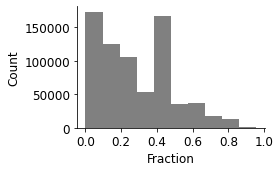

In [83]:
import seaborn
import matplotlib.pyplot as plt
# colors =  ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]
# ax = mean.plot(kind="hist", figsize=(5,5), autopct='%1.1f%%', colors = colors, fontsize=12)
ax = mean.plot(kind="hist", figsize=(4,2.5), rot=0, color = "grey", bins=10, fontsize=12)
seaborn.despine(right=True)
plt.xlabel(xlabel="Fraction", fontsize=12)
plt.ylabel(ylabel="Count", fontsize=12)
# plt.yticks([0, 100000, 200000, 300000])
# ax.legend(loc = 0, fontsize=12)
plt.tight_layout()
plt.savefig('frac.pdf')

In [14]:
from scipy.stats import gmean
import numpy as np
np.mean(pre["leak_lengths"].explode()), np.mean(pre["file_length"])
np.mean(pre["frac"].explode().to_numpy().astype(float))
# pre["frac"].explode().to_numpy()

0.27766330837096104

In [84]:
multi = data[data["multi"]]
multi

,Unnamed: 0,nb,msg,train,val,test,model,pre,overlap,multi
0,0,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,Success!,3,3,2,3,198,0,True
2,2,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,Success!,5,5,0,5,5,0,True
7,7,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,Success!,8,19,1,7,0,7,True
16,17,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,Success!,6,13,2,4,0,0,True
34,35,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,Success!,13,8,5,9,0,9,True
...,...,...,...,...,...,...,...,...,...,...
99779,4397,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,Success!,4,5,0,5,10,0,True
99781,4399,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,Success!,1,3,0,1,0,0,True
99800,4418,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,Success!,5,5,0,5,10,0,True
99824,4446,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,Success!,4,16,0,4,24,0,True


In [85]:
def find_results(row):
    file_path = row['nb']
    file_path = file_path.replace(".py", "-fact")
    multi_leaks = os.path.join(file_path, "Telemetry_MultiUseTestLeak.csv")
    involoc = os.path.join(file_path, "InvokeLineno.facts")
    lineno = os.path.join(file_path, "LinenoMapping.facts")

    multi_df = pd.read_csv(multi_leaks, sep="\t", names=['testModel', 'test', 'invo', 'meth', 'ctx1', 'testModel2', 'test2', 'invo2', 'meth2', 'ctx2'])
    
    involoc = pd.read_csv(involoc, sep="\t", names=['invo', 'line']).set_index('invo').squeeze().to_dict()
    lineno_map = pd.read_csv(lineno, sep="\t", names=['line', 'line_o']).set_index('line').squeeze().to_dict()
    def get_diff(row):
        try:
            return abs(lineno_map[involoc[row['invo']]] - lineno_map[involoc[row['invo2']]])
        except KeyError:
            return -1
    diff = multi_df[['invo', 'invo2']].apply(get_diff, axis=1)
    
    return {"leak_lengths": diff[diff >= 0].to_list(), "cnt": multi_df["invo"].nunique()}

multi[['leak_lengths', 'cnt']] = multi.apply(find_results, axis=1, result_type='expand')
multi['file_length'] = multi['nb'].map(lambda x: len(open(x).read().splitlines()))

/usr0/home/cyang3/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/tmp/ipykernel_3605/2412548977.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multi['file_length'] = multi['nb'].map(lambda x: len(open(x).read().splitlines()))


In [33]:
multi

,Unnamed: 0,nb,msg,train,val,test,model,pre,overlap,multi,leak_lengths,cnt,file_length
0,0,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,Success!,3,3,2,3,198,0,True,"[55, 74, 55, 19, 74, 19]",3,1063
2,2,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,Success!,5,5,0,5,5,0,True,[],0,451
7,7,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,Success!,8,19,1,7,0,7,True,"[37, 54, 94, 36, 53, 93, 30, 47, 87, 24, 41, 8...",13,1807
16,17,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,Success!,6,13,2,4,0,0,True,"[453, 451, 379, 104, 453, 451, 379, 104, 0]",5,1818
34,35,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,Success!,13,8,5,9,0,9,True,[],0,488
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99779,4397,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,Success!,4,5,0,5,10,0,True,[],0,557
99781,4399,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,Success!,1,3,0,1,0,0,True,[],0,350
99800,4418,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,Success!,5,5,0,5,10,0,True,"[28, 91, 157, 222, 28, 63, 129, 194, 91, 63, 6...",5,417
99824,4446,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,Success!,4,16,0,4,24,0,True,"[62, 71, 125, 134, 185, 194, 53, 62, 116, 125,...",8,482


In [86]:
multi["frac"] = multi.apply(lambda l: [x/l["file_length"] for x in l["leak_lengths"]], axis=1)

/tmp/ipykernel_3605/4030348879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multi["frac"] = multi.apply(lambda l: [x/l["file_length"] for x in l["leak_lengths"]], axis=1)


In [36]:
from scipy.stats import gmean
import numpy as np
np.mean(multi["leak_lengths"].explode()), np.mean(multi["file_length"])
np.mean(multi["frac"].explode().to_numpy().astype(float))
multi["frac"].explode().mean()
multi["cnt"].mean()

4.418397787058632

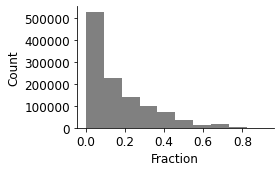

In [87]:
import seaborn
import matplotlib.pyplot as plt
ax = multi["frac"].explode().plot(kind="hist", figsize=(4,2.5), rot=0, color = "grey", bins=10, fontsize=12)
seaborn.despine(right=True)
plt.xlabel(xlabel="Fraction", fontsize=12)
plt.ylabel(ylabel="Count", fontsize=12)
# plt.yticks([0, 100000, 200000, 300000])
# ax.legend(loc = 0, fontsize=12)
plt.tight_layout()
plt.savefig('frac2.pdf')

In [41]:
over = data[data["overlap"] > 0]
over 

,Unnamed: 0,nb,msg,train,val,test,model,pre,overlap,multi
7,7,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,Success!,8,19,1,7,0,7,True
25,26,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,Success!,1,0,1,1,0,1,False
33,34,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,Success!,6,0,12,6,0,6,False
34,35,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,Success!,13,8,5,9,0,9,True
65,70,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,Success!,1,0,1,1,0,1,False
...,...,...,...,...,...,...,...,...,...,...
99634,4230,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,Success!,16,20,0,45,0,2,True
99711,4324,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,Success!,1,0,3,1,0,1,False
99712,4325,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,Success!,1,0,3,1,0,1,False
99715,4328,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,Success!,1,0,4,1,0,1,False


In [43]:
def find_results(file_path):
    file_path = file_path.replace(".py", "-fact")
    over_leaks = os.path.join(file_path, "Telemetry_OverlapLeak.csv")
    involoc = os.path.join(file_path, "InvokeLineno.facts")

    over = pd.read_csv(over_leaks, sep="\t", names=['trainModel', 'train', 'trainInvo', 'trainMeth', 'ctx1', 'testModel', 'test', 'invo', 'testMeth', 'ctx2'])
    
    involoc = pd.read_csv(involoc, sep="\t", names=['invo', 'line']).set_index('invo').squeeze().to_dict()
    def get_diff(row):
        return abs(involoc[row['invo']] - involoc[row['trainInvo']])
    diff = over[['trainInvo', 'invo']].apply(get_diff, axis=1)
    return diff.to_list()
over['length'] = over['nb'].map(find_results)

/tmp/ipykernel_2770973/1720723058.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  over['length'] = over['nb'].map(find_results)


In [45]:
over['length'].explode().median()

2.0

### Star Trend

In [22]:
import pandas as pd
data = pd.read_csv("/usr0/home/cyang3/Projects/GitHubAPI-Crawler/leak_info.txt")
star = pd.read_csv("/usr0/home/cyang3/Projects/GitHubAPI-Crawler/GitHub-data/nbstar.txt", sep="\t", names=["nb", "star"])
star["nb"] = star["nb"].str.replace(".ipynb", ".py")
data = data.merge(star, on="nb")

/tmp/ipykernel_2926260/271190908.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  star["nb"] = star["nb"].str.replace(".ipynb", ".py")


In [23]:
data["leak"] = (data["pre"]  > 0) | (data["overlap"]  > 0) | data["multi"]

In [25]:
data["star"] = pd.qcut(data["star"], 200, duplicates="drop")

In [38]:
data["star"].value_counts()

(-0.001, 1.0]     93808
(1.0, 2.0]         1639
(3.0, 4.0]         1184
(2.0, 3.0]          906
(4.0, 6.0]          607
(6.0, 9.0]          483
(18.0, 2229.0]      480
(9.0, 18.0]         378
Name: star, dtype: int64

In [35]:
trend = data.groupby("star")["leak"].apply(lambda x: sum(x)/len(x))
from scipy.stats.stats import pearsonr

t = list(x.right for x in trend.index)
pearsonr(t, trend)

(-0.4182958443558743, 0.3023802636947647)

In [211]:
pd.qcut(data["star"], 50, duplicates="drop")

0        (-0.001, 1.0]
1        (-0.001, 1.0]
2        (-0.001, 1.0]
3        (-0.001, 1.0]
4        (-0.001, 1.0]
             ...      
99480    (-0.001, 1.0]
99481    (-0.001, 1.0]
99482    (-0.001, 1.0]
99483    (-0.001, 1.0]
99484    (-0.001, 1.0]
Name: star, Length: 99485, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 1.0] < (1.0, 3.0] < (3.0, 4.0] < (4.0, 2229.0]]

In [218]:
# bounds = [(i, i) for i in range(0, 21,1)] + [(21,100000)]
bounds = [(0,0), (1, 3), (4,6), (7,9), (10, 100000)]
mean = []
for st,ed in bounds:
    d = data[(data["star"] >= st) & (data["star"] <= ed)]
    mean.append(len(d[(d["pre"]  > 0) | (d["overlap"]  > 0) | d["multi"]]) /len(d) * 100)
bounds, mean

([(0, 0), (1, 3), (4, 6), (7, 9), (10, 100000)],
 [29.88660048751192,
  28.350244926522045,
  31.60245672808487,
  17.391304347826086,
  20.862470862470865])

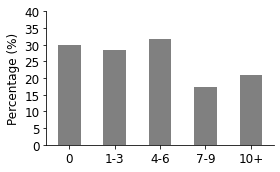

In [221]:
import seaborn
import matplotlib.pyplot as plt
mean = pd.Series(mean, index=["0", "1-3", "4-6", "7-9", "10+"])
ax = mean.plot(kind='bar', figsize=(4,2.5), color=['grey'], rot=0, fontsize=12)
seaborn.despine(right=True)
plt.ylabel(ylabel="Percentage (%)", fontsize=12)
plt.yticks([0, 5, 10, 15, 20, 25, 30, 35, 40])
# ax.legend(loc = 1, fontsize=12)
plt.tight_layout()
plt.savefig('stars.pdf')

## Generating HTML Page to Track Issues

In [10]:
ass = pd.read_csv("/usr0/home/cyang3/Projects/GitHubAPI-Crawler/GitHub-data/tutorial.txt", names=["nb"])
ass = ass.merge(data, on="nb")
f_ass = ass[(ass["pre"]  > 0) | (ass["overlap"]  > 0) | (ass["multi"])]
len(ass[ass["pre"]  > 0]) /len(ass), len(ass[ass["overlap"]  > 0]) /len(ass), len(ass[ass["multi"]]) /len(ass), \
    len(ass[(ass["pre"]  > 0) | (ass["overlap"]  > 0) | ass["multi"]]) /len(ass)


(0.0389363722697056,
 0.029439696106362774,
 0.11301044634377967,
 0.1623931623931624)

In [21]:
df = f_ass
nb_ref = []
tags = ["pre", "overlap", "multi"]
for i, row in df.iterrows():
    nb = row["nb"]
    nb = "/".join(nb.split("/")[1:]).replace(".py", ".html")
    row_tags = [tag for tag in tags if row[tag]>0]
    nb_ref.append(f'<li><a href="{nb}">{nb}</a>, {", ".join(row_tags)}</li>')
refs = '\n'.join(nb_ref)
html_page = f'''<html>
<head>
<meta http-equiv="Content-Type" content="text/html; charset=utf-8">
<title>Directory listing for /</title>
</head>
<body>
<h1>Directory listing for /</h1>
<hr>
<ul>
{refs}
</ul>
<hr>
</body>
</html>'''
with open("tutorial-leaks.html", "w") as f:
    f.write(html_page)

In [3]:
file_path = "tutorial-leak.txt"
df = pd.read_csv(file_path, sep="\t", index_col=False, names=["nb"])
nb_ref = []
for nb in df["nb"]:
    nb = "/".join(nb.split("/")[1:]).replace(".py", ".html")
    nb_ref.append(f'<li><a href="{nb}">{nb}</a></li>')
refs = '\n'.join(nb_ref)
html_page = f'''<html>
<head>
<meta http-equiv="Content-Type" content="text/html; charset=utf-8">
<title>Directory listing for /</title>
</head>
<body>
<h1>Directory listing for /</h1>
<hr>
<ul>
{refs}
</ul>
<hr>
</body>
</html>'''
# with open("tutorial-leaks.html", "w") as f:
#     f.write(html_page)

'<html>\n<head>\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n<title>Directory listing for /</title>\n</head>\n<body>\n<h1>Directory listing for /</h1>\n<hr>\n<ul>\n<li><a href="notebooks/2021-09-01/nb_197.html">notebooks/2021-09-01/nb_197.html</a></li>\n<li><a href="notebooks/2021-09-01/nb_556.html">notebooks/2021-09-01/nb_556.html</a></li>\n<li><a href="notebooks/2021-09-01/nb_1279.html">notebooks/2021-09-01/nb_1279.html</a></li>\n<li><a href="notebooks/2021-09-01/nb_1280.html">notebooks/2021-09-01/nb_1280.html</a></li>\n<li><a href="notebooks/2021-09-01/nb_2596.html">notebooks/2021-09-01/nb_2596.html</a></li>\n<li><a href="notebooks/2021-09-01/nb_2610.html">notebooks/2021-09-01/nb_2610.html</a></li>\n<li><a href="notebooks/2021-09-02/nb_132.html">notebooks/2021-09-02/nb_132.html</a></li>\n<li><a href="notebooks/2021-09-02/nb_897.html">notebooks/2021-09-02/nb_897.html</a></li>\n<li><a href="notebooks/2021-09-02/nb_1354.html">notebooks/2021-09-02/nb_1354.html</

## Analyzing Samples for Acc

In [3]:
# analyze sample log
import sys, os
import pandas as pd
file_path = "/usr0/home/cyang3/Projects/GitHubAPI-Crawler/GitHub-data/sample.txt-log.txt"
df = pd.read_csv(file_path, sep="\t", index_col=False, names=["nb", "msg", "t1", "t2", "t3", "t"])
df = df[["nb", "msg"]]
df["nb"] = df["nb"].map(lambda x: os.path.join("..", "..", "GitHubAPI-Crawler", x))
df = df[df["msg"] == "Success!"]
def find_results(file_path):
    file_path = file_path.replace(".py", "-fact")
    model_pairs = os.path.join(file_path, "ModelPair.csv")
    pre_leaks = os.path.join(file_path, "Telemetry_FinalPreProcessingLeak.csv")
    overlap_leaks = os.path.join(file_path, "FinalOverlapLeak.csv")
    multi_leaks = os.path.join(file_path, "FinalNoTestDataWithMultiUse.csv")
    has_pairs = len(open(model_pairs).read().splitlines()) > 0
    has_pre_leaks = len(open(pre_leaks).read().splitlines()) > 0
    has_overlap_leaks = len(open(overlap_leaks).read().splitlines()) > 0
    has_multi_leaks = len(open(multi_leaks).read().splitlines()) > 0
    return {"model": has_pairs, "pre": has_pre_leaks, "overlap": has_overlap_leaks, "multi": has_multi_leaks}
# df.merge(df["nb"].map(find_results), left_index=True, right_index=True)
applied_df = df.apply(lambda row: find_results(row["nb"]), axis='columns', result_type='expand')
df = pd.concat([df, applied_df], axis='columns')
df

,nb,msg,model,pre,overlap,multi
0,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,Success!,True,False,False,False
1,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,Success!,True,True,False,False
2,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,Success!,True,False,False,False
3,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,Success!,True,True,False,False
4,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,Success!,True,False,False,False
...,...,...,...,...,...,...
103,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,Success!,True,False,False,False
104,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,Success!,True,False,False,False
105,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,Success!,True,False,True,True
106,../../GitHubAPI-Crawler/GitHub-data/notebooks/...,Success!,True,False,False,False


In [4]:
import pandas as pd
df2 = pd.read_csv("/usr0/home/cyang3/Projects/GitHubAPI-Crawler/GitHub-data/manual-labels.csv")
def translate(x:str):
    return str(x).startswith("Y")
df2 = df2[['nb', 'model', 'pre', 'overlap', 'multi']]
df2["nb"] = df2["nb"].map(lambda x: os.path.join("..", "..", "GitHubAPI-Crawler", x))
columns = ['model', 'pre', 'overlap', 'multi']
for col in columns:
    df2[col] = df2[col].map(translate)
merged = df2.merge(df, on="nb")
merged["nb"] = merged["nb"].map(lambda x: '/'.join(x.split('/')[-2:]))
col = "multi"
# merged[merged[f"model_x"] == merged[f"model_y"]][merged[f"multi_x"] == merged[f"multi_y"]][merged[f"pre_x"] == merged[f"pre_y"]][merged[f"overlap_x"] == merged[f"overlap_y"]]
len(merged[merged[f"model_y"] == True][merged[f"{col}_x"] != merged[f"{col}_y"]])

/tmp/ipykernel_2770973/1827310437.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(merged[merged[f"model_y"] == True][merged[f"{col}_x"] != merged[f"{col}_y"]])


13

In [12]:
len(df[df["multi"] == True])
df[df["multi"]]["nb"].tolist()

['../../GitHubAPI-Crawler/GitHub-data/notebooks/2021-09-17/nb_1782.py',
 '../../GitHubAPI-Crawler/GitHub-data/notebooks/2021-09-30/nb_195.py',
 '../../GitHubAPI-Crawler/GitHub-data/notebooks/2021-09-01/nb_604.py',
 '../../GitHubAPI-Crawler/GitHub-data/notebooks/2021-09-10/nb_2760.py',
 '../../GitHubAPI-Crawler/GitHub-data/notebooks/2021-09-10/nb_322.py',
 '../../GitHubAPI-Crawler/GitHub-data/notebooks/2021-09-27/nb_3449.py',
 '../../GitHubAPI-Crawler/GitHub-data/notebooks/2021-09-05/nb_2816.py',
 '../../GitHubAPI-Crawler/GitHub-data/notebooks/2021-09-30/nb_3594.py',
 '../../GitHubAPI-Crawler/GitHub-data/notebooks/2021-09-15/nb_281.py',
 '../../GitHubAPI-Crawler/GitHub-data/notebooks/2021-09-05/nb_1162.py',
 '../../GitHubAPI-Crawler/GitHub-data/notebooks/2021-09-05/nb_2770.py',
 '../../GitHubAPI-Crawler/GitHub-data/notebooks/2021-09-30/nb_89.py',
 '../../GitHubAPI-Crawler/GitHub-data/notebooks/2021-09-05/nb_773.py',
 '../../GitHubAPI-Crawler/GitHub-data/notebooks/2021-09-20/nb_1743.py',

In [7]:
import random
df = pd.read_csv("../tmp/log-03-28.txt", sep="/", names=["pp", "p", "c", "n", "date", "file", "label"])
df["file"] = df["file"].str.replace("-fact", ".py")
files = df.groupby("label")["file"].apply(list).map(lambda x: sorted(random.sample(x, 20), key=lambda x:int(x[3:-3])))

In [9]:
files[0]

['nb_119.py',
 'nb_216.py',
 'nb_353.py',
 'nb_359.py',
 'nb_645.py',
 'nb_701.py',
 'nb_798.py',
 'nb_886.py',
 'nb_906.py',
 'nb_1084.py',
 'nb_1147.py',
 'nb_1243.py',
 'nb_1386.py',
 'nb_1524.py',
 'nb_1643.py',
 'nb_1949.py',
 'nb_2125.py',
 'nb_2132.py',
 'nb_2387.py',
 'nb_3125.py']

In [40]:
with open('/usr0/home/cyang3/Projects/py-analysis/tmp.txt') as f:
    text = f.read().splitlines()
ns = {int(l.split('/')[-2][3:-5]) for l in text}

def extract_set(path):
    with open(path) as f:
        text = f.read().splitlines()
    return {int(l.split('/')[-2][3:-5]) for l in text}

finals = extract_set("../finals.txt")
multileak = extract_set("../multileak.txt")
notrain = extract_set("../tmp.txt")
notest = extract_set('../notest.txt')
novaltest = extract_set('../novaltest.txt')
(finals - notrain) - multileak 

{3,
 10,
 17,
 18,
 20,
 25,
 70,
 71,
 91,
 97,
 106,
 126,
 144,
 145,
 151,
 152,
 153,
 154,
 155,
 160,
 165,
 178,
 180,
 181,
 182,
 187,
 190,
 192,
 193,
 196,
 197,
 198,
 199,
 200,
 203,
 208,
 220,
 225,
 226,
 239,
 243,
 255,
 257,
 264,
 265,
 267,
 269,
 277,
 279,
 285,
 293,
 297,
 304,
 306,
 308,
 319,
 324,
 325,
 329,
 332,
 333,
 343,
 344,
 349,
 353,
 360,
 365,
 380,
 383,
 385,
 387,
 388,
 394,
 406,
 422,
 437,
 438,
 441,
 449,
 450,
 452,
 456,
 457,
 463,
 464,
 474,
 479,
 481,
 485,
 495,
 496,
 498,
 499,
 500,
 501,
 503,
 504,
 506,
 507,
 508,
 510,
 513,
 515,
 521,
 522,
 525,
 535,
 539,
 549,
 555,
 565,
 568,
 578,
 579,
 580,
 591,
 597,
 598,
 602,
 604,
 622,
 625,
 629,
 632,
 666,
 669,
 671,
 672,
 674,
 682,
 684,
 685,
 686,
 687,
 688,
 689,
 690,
 691,
 692,
 694,
 695,
 696,
 709,
 710,
 711,
 713,
 714,
 718,
 719,
 721,
 722,
 723,
 724,
 725,
 726,
 727,
 728,
 729,
 730,
 737,
 739,
 740,
 741,
 742,
 743,
 744,
 745,
 746,
 74

In [18]:
text = '''preprocessing.add_dummy_feature(X[, value])

Augment dataset with an additional dummy feature.

preprocessing.binarize(X, *[, threshold, copy])

Boolean thresholding of array-like or scipy.sparse matrix.

preprocessing.label_binarize(y, *, classes)

Binarize labels in a one-vs-all fashion.

preprocessing.maxabs_scale(X, *[, axis, copy])

Scale each feature to the [-1, 1] range without breaking the sparsity.

preprocessing.minmax_scale(X[, ...])

Transform features by scaling each feature to a given range.

preprocessing.normalize(X[, norm, axis, ...])

Scale input vectors individually to unit norm (vector length).

preprocessing.quantile_transform(X, *[, ...])

Transform features using quantiles information.

preprocessing.robust_scale(X, *[, axis, ...])

Standardize a dataset along any axis.

preprocessing.scale(X, *[, axis, with_mean, ...])

Standardize a dataset along any axis.

preprocessing.power_transform(X[, method, ...])

Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like.
'''
fs = text.split('\n')
fs = [x.split('(')[0] for x in fs if '(' in x]
fs = [x.replace('preprocessing.', '') for x in fs if ' ' not in x]
# ori = 'accuracy_score|balanced_accuracy_score|top_k_accuracy_score|average_precision_score|brier_score_loss|f1_score|log_loss|precision_score|recall_score|jaccard_score|roc_auc_score|roc_auc_score|roc_auc_score|roc_auc_score|roc_auc_score|adjusted_mutual_info_score|adjusted_rand_score|completeness_score|fowlkes_mallows_score|homogeneity_score|mutual_info_score|normalized_mutual_info_score|rand_score|v_measure_score|explained_variance_score|max_error|mean_absolute_error|mean_squared_error|mean_squared_error|mean_squared_log_error|median_absolute_error|r2_score|mean_poisson_deviance|mean_gamma_deviance|mean_absolute_percentage_errors'
# set(ori.split('|')) - set(fs)
'|'.join(fs)

'add_dummy_feature|binarize|label_binarize|maxabs_scale|minmax_scale|normalize|quantile_transform|robust_scale|scale|power_transform'

In [5]:
output_file = "../tmp/log-03-28.txt"
input_path = "../../GitHubAPI-Crawler/notebooks/2021-01-02/*"
os.system(f"grep -l 'invo' {input_path}/Telemetry_Pre* | sort -V > {output_file}")
os.system(f"grep -l '' {input_path}/FinalOver* | sort -V >> {output_file}")
os.system(f"grep -l '' {input_path}/FinalNoTestDataWithMultiUse* | sort -V >> {output_file}")
# os.system(f"grep -l 'invo' ../../GitHubAPI-Crawler/notebooks/2021-01-01/*/NoTest* | sort -V >> {output_file}")
# os.system(f"grep -l 'invo' ../../GitHubAPI-Crawler/notebooks/2021-01-01/*/NoVal* | sort -V >> {output_file}")

0

In [6]:
js_query_code = '''
var terf = document.getElementById('hyper-parameter-optimizers');
var firstChilds = terf.querySelectorAll("td:first-child");
var allName = [];
for(i=0; i<firstChilds.length; ++i){
  allName.push(firstChilds[i].innerText.split('.')[1].split('(')[0]);
}
console.log(allName.join('|'));
'''

Multitest samples:
['../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_23-fact/MultiUseTestLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_33-fact/MultiUseTestLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_50-fact/MultiUseTestLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_56-fact/MultiUseTestLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_64-fact/MultiUseTestLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_134-fact/MultiUseTestLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_163-fact/MultiUseTestLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_167-fact/MultiUseTestLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_187-fact/MultiUseTestLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_259-fact/MultiUseTestLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_286-fact/MultiUseTestLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_288-fact/MultiUseTestLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_295-fact/MultiUseTestLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_347-fact/MultiUseTestLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_447-fact/MultiUseTestLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_528-fact/MultiUseTestLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_535-fact/MultiUseTestLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_539-fact/MultiUseTestLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_620-fact/MultiUseTestLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_656-fact/MultiUseTestLeak.csv']

Overlap samples:
<!-- ['../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_9-fact/Telemetry_OverlapLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_40-fact/Telemetry_OverlapLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_69-fact/Telemetry_OverlapLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_163-fact/Telemetry_OverlapLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_178-fact/Telemetry_OverlapLeak.csv', -->
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_212-fact/Telemetry_OverlapLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_264-fact/Telemetry_OverlapLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_279-fact/Telemetry_OverlapLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_413-fact/Telemetry_OverlapLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_416-fact/Telemetry_OverlapLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_427-fact/Telemetry_OverlapLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_469-fact/Telemetry_OverlapLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_507-fact/Telemetry_OverlapLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_511-fact/Telemetry_OverlapLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_535-fact/Telemetry_OverlapLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_539-fact/Telemetry_OverlapLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_618-fact/Telemetry_OverlapLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_620-fact/Telemetry_OverlapLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_679-fact/Telemetry_OverlapLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_703-fact/Telemetry_OverlapLeak.csv']

Preprocessing samples:
<!-- ['../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_10-fact/Telemetry_PreProcessingLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_55-fact/Telemetry_PreProcessingLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_64-fact/Telemetry_PreProcessingLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_135-fact/Telemetry_PreProcessingLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_149-fact/Telemetry_PreProcessingLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_169-fact/Telemetry_PreProcessingLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_216-fact/Telemetry_PreProcessingLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_268-fact/Telemetry_PreProcessingLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_273-fact/Telemetry_PreProcessingLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_275-fact/Telemetry_PreProcessingLeak.csv', -->
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_361-fact/Telemetry_PreProcessingLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_368-fact/Telemetry_PreProcessingLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_389-fact/Telemetry_PreProcessingLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_392-fact/Telemetry_PreProcessingLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_400-fact/Telemetry_PreProcessingLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_418-fact/Telemetry_PreProcessingLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_534-fact/Telemetry_PreProcessingLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_627-fact/Telemetry_PreProcessingLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_681-fact/Telemetry_PreProcessingLeak.csv',
 '../../GitHubAPI-Crawler/notebooks/2021-01-01/nb_694-fact/Telemetry_PreProcessingLeak.csv']